In [5]:
import sys  
sys.path.insert(0, './scripts')
from librairies import *

WIDTH=512
HEIGHT=256
        
def read_image(x):  
    """  
    Reads and preprocesses an image.  

    Parameters:  
    - x: filepath to the image.  

    Returns:  
    The processed image.  
    """
    x = cv2.imread(x, cv2.IMREAD_COLOR)  
    x = cv2.resize(x, (WIDTH, HEIGHT))  
    x = x/255.0  
    x = x.astype(np.float32)  
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    return x  

def model_inference_with_display(image_path):  
    # Load and preprocess the image  
    image = read_image(image_path)  
    image_to_predict = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image_to_predict)  
    predicted_mask = tf.argmax(prediction, axis=-1)[0] 

    plt.figure(figsize=(16, 6))  
    
    plt.subplot(1, 3, 1)  
    plt.title('Original Image')  
    plt.imshow(image)  
    plt.axis('off')  
    
    plt.subplot(1, 3, 2)  
    plt.title('Predicted Mask')  
    plt.imshow(predicted_mask, cmap='viridis')  
    plt.axis('off')  

    plt.subplot(1, 3, 3)  
    plt.title('Original + Pred Mask')  
    plt.imshow(image)
    plt.imshow(predicted_mask, cmap='viridis', alpha=0.5)  
    plt.axis('off')  
    
    plt.show()
    

def dice_coef(y_true, y_pred, smooth=1e-6):  
    """   
    Calculate the Dice Coefficient for measuring the similarity between two samples.  
      
    Parameters:  
    - y_true: The ground truth labels.  
    - y_pred: The predicted labels.  
    - smooth: A smoothing factor to avoid division by zero.  
      
    Returns:  
    - Dice Coefficient as a float.  
    """ 
    y_true_f = K.flatten(y_true)  
    y_pred_f = K.flatten(y_pred)  
    intersection = K.sum(y_true_f * y_pred_f)  
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)  
  
def iou(y_true, y_pred, smooth=1e-6):  
    """  
    Calculate the Intersection over Union (IoU) between the predicted and ground truth masks.  
      
    Parameters:  
    - y_true: The ground truth masks.  
    - y_pred: The predicted masks.  
    - smooth: A smoothing factor to avoid division by zero.  
      
    Returns:  
    - IoU score as a float.  
    """ 
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])  
    union = K.sum(y_true,[1,2,3]) + K.sum(y_pred,[1,2,3]) - intersection  
    return K.mean((intersection + smooth) / (union + smooth), axis=0)  
    

1/1 [==============================] - 0s 213ms/step


2024-03-04 22:56:25.008384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


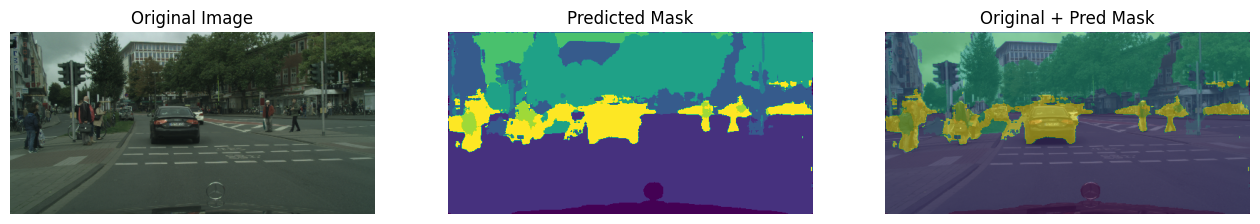

In [6]:
model = tf.keras.models.load_model("model_unet_mini.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 127ms/step


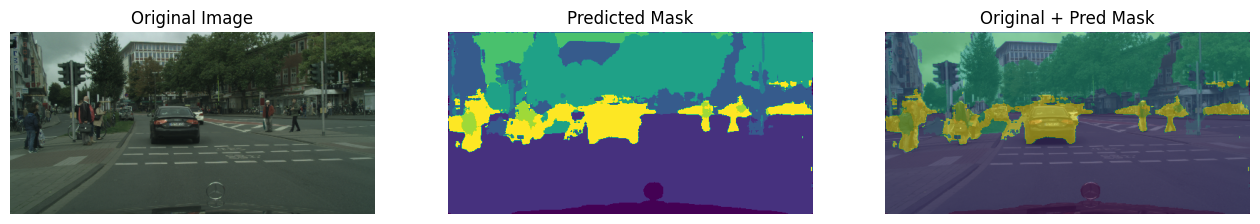

In [7]:
model = tf.keras.models.load_model("model_unet_mini_augmented.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 225ms/step


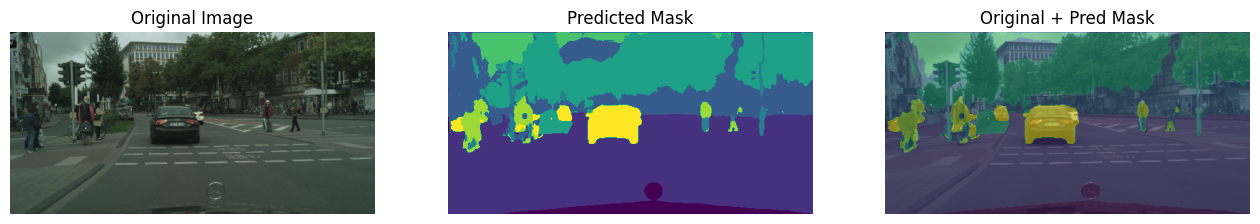

In [8]:
model = tf.keras.models.load_model("model_unet_augmented.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 216ms/step


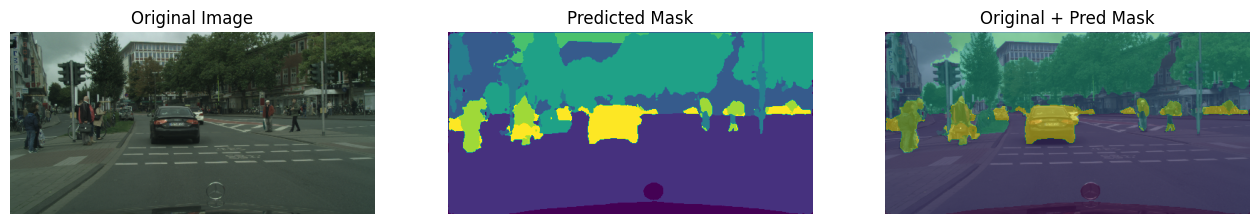

In [9]:
model = tf.keras.models.load_model("model_unet.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 240ms/step


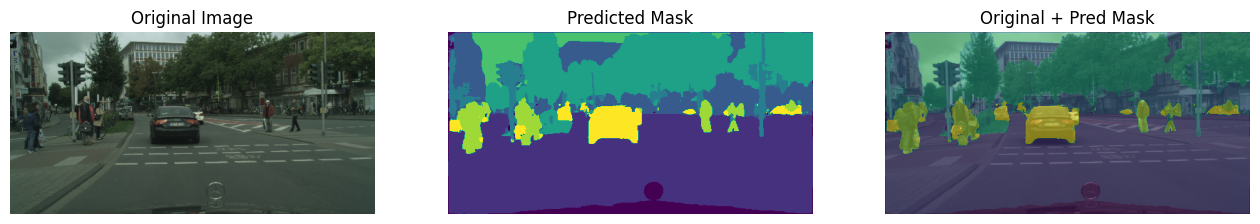

In [10]:
model = tf.keras.models.load_model("model_unet_vgg16.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 364ms/step


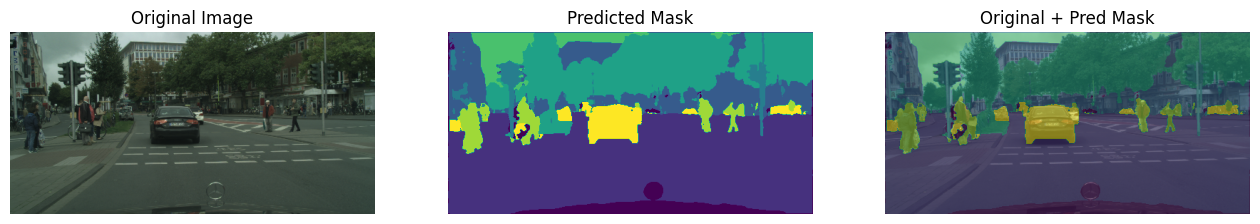

In [12]:
model = tf.keras.models.load_model("model_vgg16_augmented.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 273ms/step


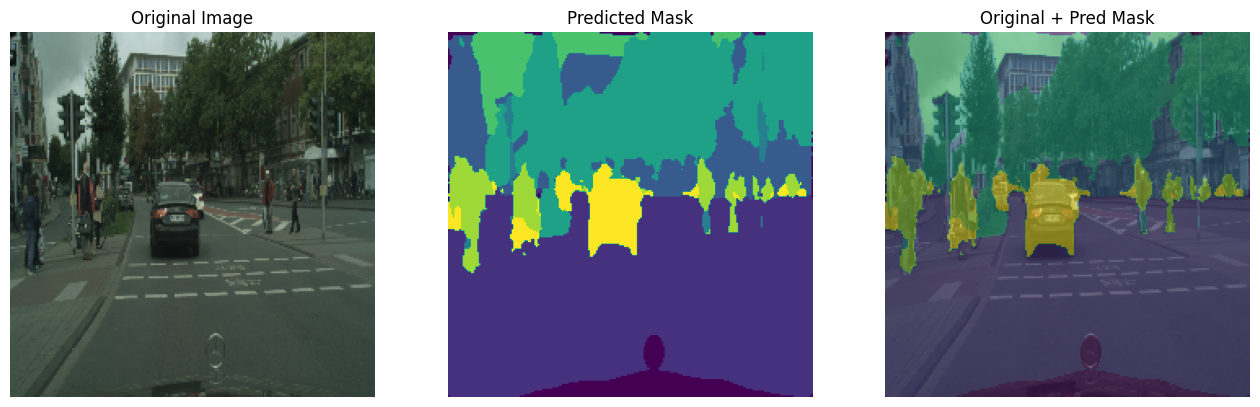

In [14]:
WIDTH=224
HEIGHT=224
model = tf.keras.models.load_model("model_unet_resized_augmented.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 207ms/step


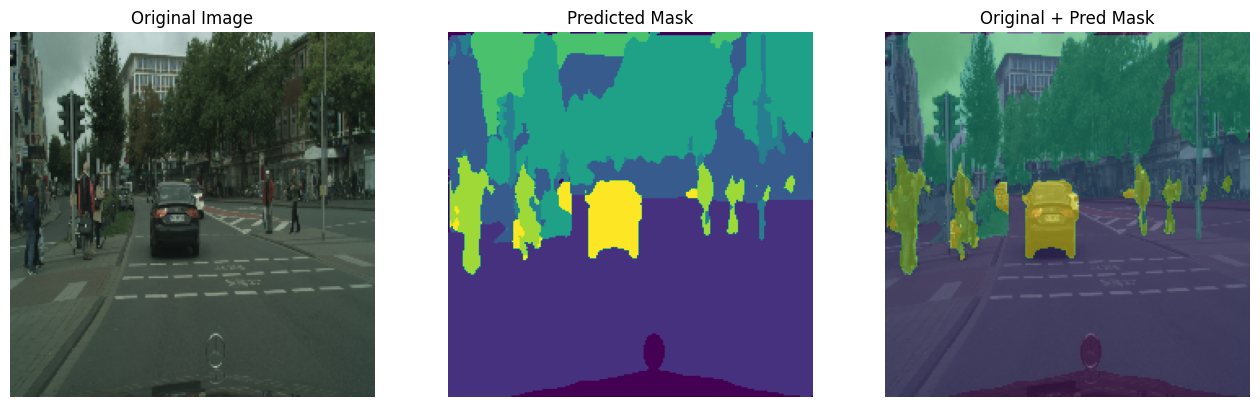

In [15]:
model = tf.keras.models.load_model("model_unet_resized.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")

1/1 [==============================] - 0s 207ms/step


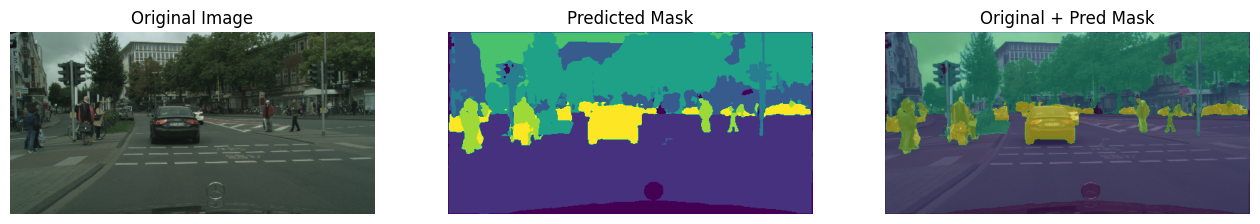

In [16]:
WIDTH=512
HEIGHT=256
model = tf.keras.models.load_model("model_best.keras", custom_objects={'dice_coef': dice_coef, 'iou': iou})
model_inference_with_display("./img.png")